# Análisis exploratorio de Datos #

En este notebook analizaremos la información que está contenida en los datasets de este proyecto. Que luego serán utilizados para entrenar los modelos de predicción.

Importamos las librerías que utilizaremos en este análisis y abrimos los datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import ast, datetime
import warnings
warnings.filterwarnings('ignore')

In [50]:
games = pd.read_csv("./data/csv/games_steam.csv")

reviews = pd.read_csv("./data/csv/user_review.csv")
items = pd.read_parquet("./data/csv/df_items_2.parquet")

### Análisis de valores faltantes y outliers.

A continuación, veamos cuantos valores nulos tienen estos datasets.

In [7]:
dict(games.isna().sum())

{'publisher': 8070,
 'genres': 3282,
 'app_name': 1,
 'title': 2049,
 'url': 0,
 'release_date': 2140,
 'tags': 162,
 'reviews_url': 1,
 'specs': 669,
 'price': 1377,
 'early_access': 0,
 'id': 1,
 'developer': 3298}

In [8]:
dict(reviews.isna().sum())

{'user_id': 0, 'user_url': 0, 'reviews': 0}

In [9]:
dict(items.isna().sum())

{'user_id': 0, 'items_count': 0, 'steam_id': 0, 'user_url': 0, 'items': 0}

Como podemos ver, en las respuestas de arriba, el único dataset que contiene valores faltantes es el dataset de los juegos.

Visualicemos como están distribuidos estos valores faltantes en el dataset de juegos.

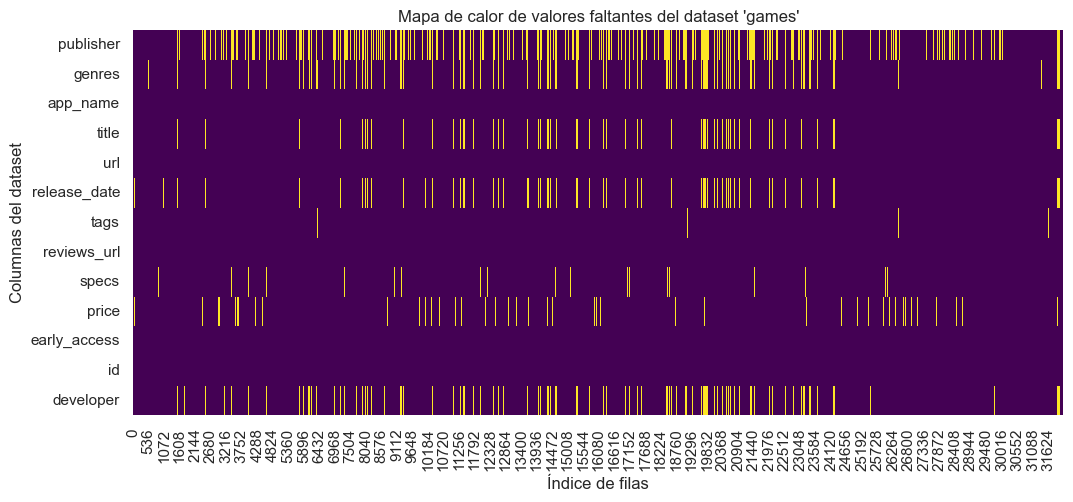

In [14]:
plt.figure(figsize=(12,5))
sns.heatmap(games.isna().T, cmap= 'viridis', cbar= False)

plt.title("Mapa de calor de valores faltantes del dataset 'games'")
plt.ylabel("Columnas del dataset")
plt.xlabel("Índice de filas")
plt.show()

Viendo el mapa de calor, podemos concluir que no existe relación directa en la existencia de valores faltantes. Pudieron haberse producido de manera aleatoria.

Veamos las cabeceras de los datasets.

In [20]:
games.head(5)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,670290.0,Poolians.com
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,False,773570.0,NaN


In [21]:
reviews.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [22]:
items.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


Veamos ahora los géneros de los juegos. ¿Cuantós juegos entran en la categoría "Action"? ¿Y en el género de "Indie"? Veamos la siguiente gráfica de barras:

In [24]:
games.genres = games.genres.apply(lambda x: ast.literal_eval(x) if type(x) == str else [])

dicc_genres = {}
for lista_genres in games.genres:
    for genre in lista_genres:
        dicc_genres[f"{genre}"] = 0

for lista_genres in games.genres:
    for genre in lista_genres:
        dicc_genres[f"{genre}"] += 1

categorias = list(dicc_genres.keys())

plt.figure(figsize=(12,6))
plt.barh(categorias, width= list(dicc_genres.values()), edgecolor= 'k')

plt.title("Gráfico de barras horizontales de la cantidad de juego por género")
plt.xlabel("Cantidad de juegos")
plt.ylabel("Géneros")

plt.show()

Vemos que hay más de quince mil juegos que pretenecen al género Indie. Mientras que hay dos mil juegos "Free to Play". Además de los demás géneros.

Veamos las características principales que tienen los juegos:

In [51]:
games['specs'] = games['specs'].apply(lambda x: ast.literal_eval(x) if type(x) == str else [])

In [61]:
dicc_specs = {}
for line in games['specs']:
    for sp in line:
        dicc_specs[f"{sp}"] = 0

    
for line in games['specs']:
    for sp in line:
        dicc_specs[f"{sp}"] += 1
print("Las siguientes son las especificaciones que aparecen en más de 1000 juegos diferentes:")
for n, (spec, count) in enumerate(dicc_specs.items()):
    if count > 1000:
        print(f" ->  {spec} //  {count}")
    else: 
        pass


Las siguientes son las especificaciones que aparecen en más de 1000 juegos diferentes:
 ->  Single-player //  27577
 ->  Multi-player //  8198
 ->  Online Multi-Player //  2370
 ->  Cross-Platform Multiplayer //  2550
 ->  Steam Achievements //  16366
 ->  Steam Trading Cards //  12199
 ->  Stats //  2321
 ->  Full controller support //  7385
 ->  HTC Vive //  1984
 ->  Oculus Rift //  1213
 ->  Tracked Motion Controllers //  1816
 ->  Room-Scale //  1445
 ->  Downloadable Content //  12691
 ->  Steam Cloud //  9960
 ->  Steam Leaderboards //  6081
 ->  Partial Controller Support //  6539
 ->  Seated //  1090
 ->  Standing //  1462
 ->  Shared/Split Screen //  3962
 ->  Local Multi-Player //  1237
 ->  Co-op //  4280
 ->  Captions available //  1643
 ->  Steam Workshop //  1866
 ->  Includes level editor //  1377


Son muchas especificaciones diferentes! Hay muchas que superan 5'000 juegos, y otros más de 10'000 juegos. Veamos cuantos especificaciones hay en realidad:

In [64]:
print(f"Hay {len(dicc_specs.keys())} especificaciones en el dataset.")

Hay 41 especificaciones en el dataset.


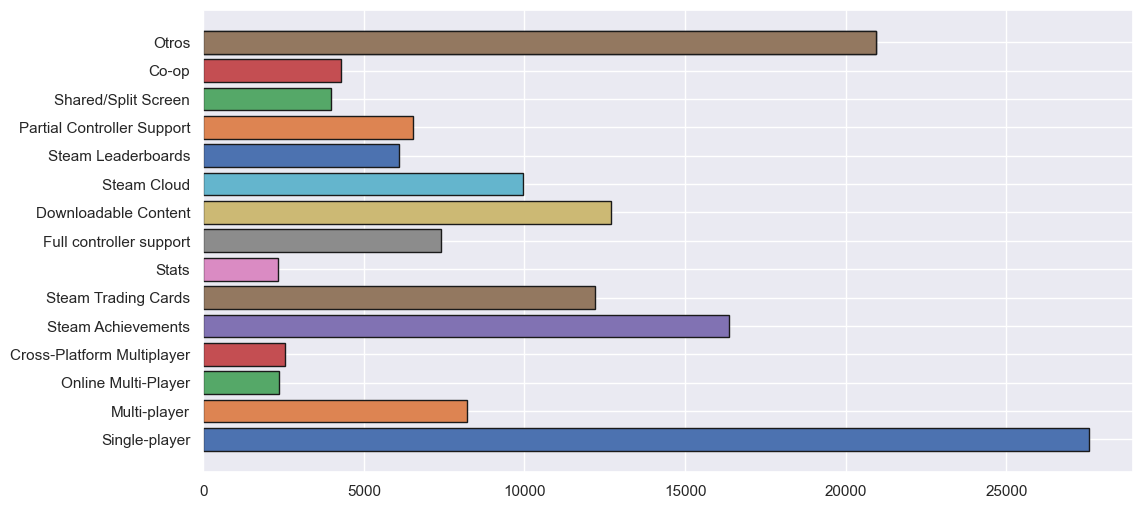

In [75]:
plt.figure(figsize=(12,6))

dicc_specs['Otros'] = 0
for spec, count in dicc_specs.items():
    if count > 2000:
        plt.barh(spec, count, edgecolor= 'k')
    else:
        dicc_specs['Otros'] += count

plt.barh(['Otros'], dicc_specs['Otros'], edgecolor='k')
plt.show()
